<a href="https://colab.research.google.com/github/SIBLEXAVIER/Data-Science-Project-Series/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('stock data.csv')

In [3]:
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [4]:
df.shape

(7781, 1285)

In [5]:
column_names = df.columns
print(column_names)

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


In [7]:
df.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,2022-12-30,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


In [8]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [9]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [10]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64

In [13]:
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
98,2022-05-24,13.810000,14.120000,13.610000,14.100000,14.100000,74700,ASLE,47.575179,48.098729,...,15.09,57.142875,47.186159,57.142875,47.186159,9.956716,0.644521,-0.060000,-0.423732,0
99,2022-05-25,14.100000,14.320000,14.050000,14.180000,14.180000,71400,ASLE,48.459097,47.832464,...,14.76,70.707082,59.066871,70.707082,59.066871,11.640211,0.616048,0.210000,1.503221,0
100,2022-05-26,14.120000,14.347000,13.790000,13.820000,13.820000,89700,ASLE,44.815889,49.493682,...,14.76,52.525237,60.125065,52.525237,60.125065,-7.599827,0.773943,0.510000,3.831707,0
101,2022-05-27,14.010000,14.250000,13.940000,14.110000,14.110000,84800,ASLE,48.178500,49.045623,...,14.76,67.171696,63.468005,67.171696,63.468005,3.703691,0.731665,0.060000,0.427049,0
102,2022-05-31,14.140000,14.140000,13.530000,13.860000,13.860000,315400,ASLE,45.611408,65.015137,...,14.76,52.127632,57.274855,52.127632,57.274855,-5.147223,2.721311,0.750000,5.720824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,ATLO,45.827378,48.222673,...,23.60,-26.417248,-17.134822,-26.417248,-17.134822,-9.282426,0.938776,0.604294,2.811801,0
7772,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,ATLO,44.016221,69.143430,...,23.60,-28.900837,-23.695948,-28.900837,-23.695948,-5.204889,9.836735,0.730997,3.432489,0
7773,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,ATLO,51.113614,49.069797,...,23.60,-9.727156,-21.681747,-9.727156,-21.681747,11.954591,1.428571,0.497078,2.283919,0
7774,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,ATLO,61.385254,47.701266,...,23.60,27.821310,-3.602228,27.821310,-3.602228,31.423537,0.653061,0.292400,1.303786,0


In [14]:
df.isna().sum()

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64

In [15]:
correlation_matrix = df.corr()

<ipython-input-15-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [16]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [17]:
correlation_matrix

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
open,1.000000,0.999881,0.999907,0.999724,0.999710,0.038828,0.097961,-0.010663,0.110511,-0.004679,...,0.997857,0.079538,0.084369,0.079538,0.084369,-0.011758,-0.031200,-0.051163,-0.005869,0.003500
high,0.999881,1.000000,0.999901,0.999912,0.999902,0.039719,0.098971,-0.008660,0.111168,-0.002566,...,0.997892,0.081431,0.085567,0.081431,0.085567,-0.008796,-0.030572,-0.049675,-0.005632,0.004375
low,0.999907,0.999901,1.000000,0.999875,0.999851,0.038620,0.099035,-0.011711,0.111261,-0.005612,...,0.997717,0.079502,0.083758,0.079502,0.083758,-0.009462,-0.031384,-0.052318,-0.006131,0.002912
close,0.999724,0.999912,0.999875,1.000000,0.999984,0.039548,0.100370,-0.009568,0.112268,-0.003402,...,0.997628,0.081690,0.085160,0.081690,0.085160,-0.006114,-0.030836,-0.049955,-0.005812,0.003868
adjclose,0.999710,0.999902,0.999851,0.999984,1.000000,0.040067,0.100621,-0.009537,0.112562,-0.003347,...,0.997601,0.085278,0.088847,0.085278,0.088847,-0.006165,-0.030756,-0.049751,-0.005670,0.004603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stochastic-kd-15,-0.011758,-0.008796,-0.009462,-0.006114,-0.006165,0.021876,0.124783,0.067549,0.067671,0.062324,...,-0.010955,0.216043,-0.029056,0.216043,-0.029056,1.000000,0.034310,0.016876,-0.000639,-0.002715
volumenrelativo,-0.031200,-0.030572,-0.031384,-0.030836,-0.030756,0.483200,-0.035562,0.495627,-0.034009,0.575554,...,-0.029798,-0.002665,-0.011313,-0.002665,-0.011313,0.034310,1.000000,0.007016,0.012571,0.040110
diff,-0.051163,-0.049675,-0.052318,-0.049955,-0.049751,0.024289,-0.023272,0.050718,-0.031327,0.055327,...,-0.041961,0.007160,0.003107,0.007160,0.003107,0.016876,0.007016,1.000000,0.202617,0.252773
INCREMENTO,-0.005869,-0.005632,-0.006131,-0.005812,-0.005670,-0.036679,-0.019535,0.021256,-0.029604,0.021067,...,-0.002358,0.024041,0.024772,0.024041,0.024772,-0.000639,0.012571,0.202617,1.000000,0.530910


In [18]:
import seaborn as sns

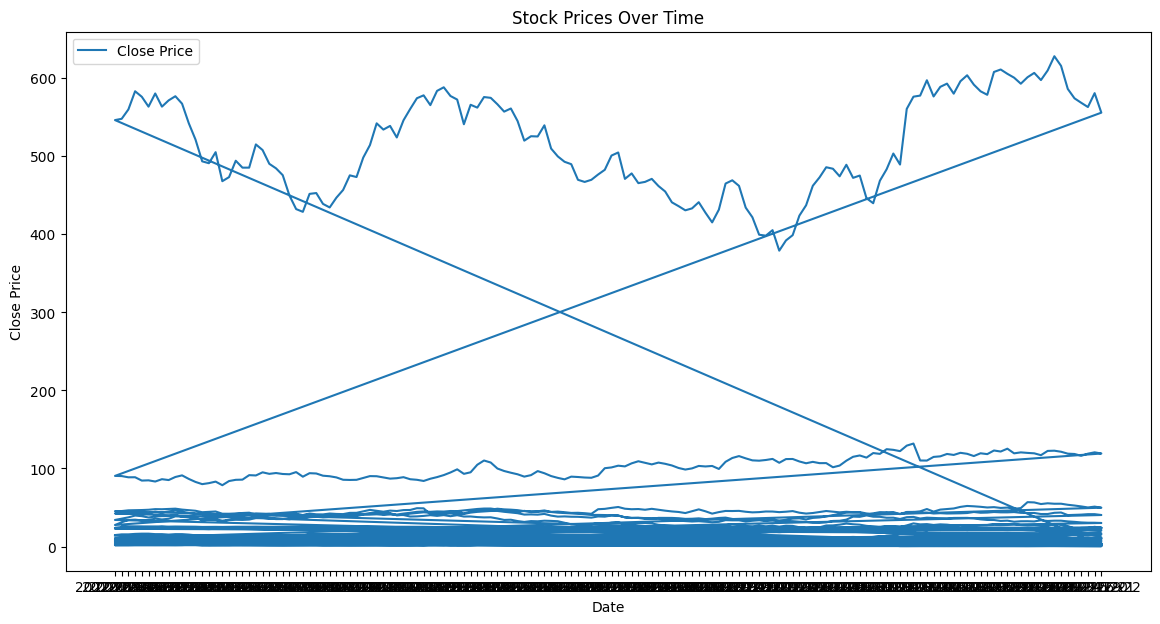

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

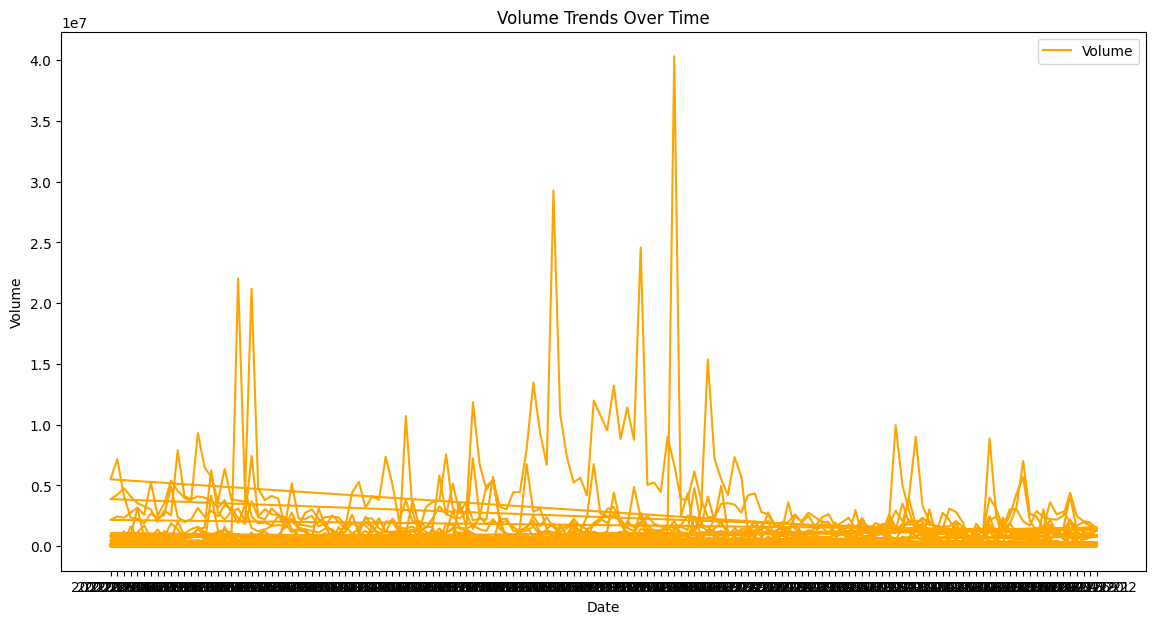

In [20]:
# Plotting volume trends over time
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Trends Over Time')
plt.legend()
plt.show()


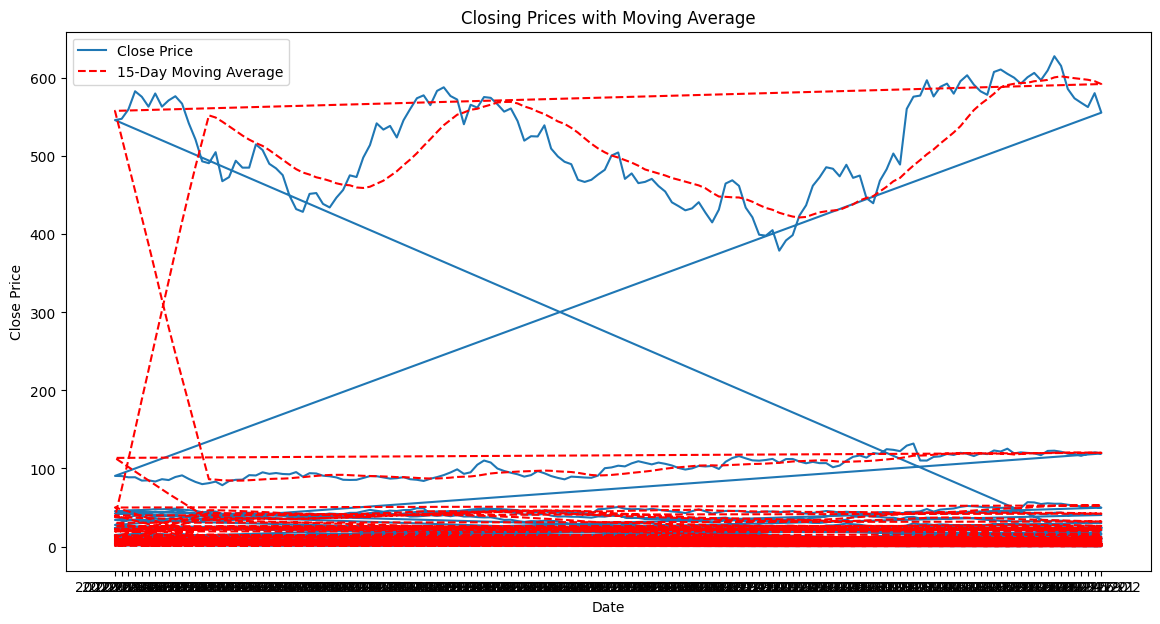

In [21]:
# Plotting moving average of closing prices
window_size = 15  # You can adjust the window size based on your preference
df['MA_close'] = df['close'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['MA_close'], label=f'{window_size}-Day Moving Average', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices with Moving Average')
plt.legend()
plt.show()


In [22]:
print(df.isnull().sum())

date                0
open                0
high                0
low                 0
close               0
                   ..
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
MA_close           14
Length: 1286, dtype: int64


In [23]:
df_cleaned = df.dropna()

In [24]:
print("\nNull values after removal:")
print(df_cleaned.isnull().sum())


Null values after removal:
date               0
open               0
high               0
low                0
close              0
                  ..
volumenrelativo    0
diff               0
INCREMENTO         0
TARGET             0
MA_close           0
Length: 1286, dtype: int64


Predictive Modeling:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [26]:
features = df[['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15']]

In [27]:
target = df['TARGET']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Build a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
predictions = model.predict(X_test_scaled)


In [32]:
print(predictions)

[0.21543686 0.19642296 0.20448194 0.17476171 0.17318109 0.23987431
 0.19765625 0.19586072 0.26691949 0.23991989 0.30574644 0.21280568
 0.25684974 0.21521014 0.2226592  0.21374074 0.21751615 0.21050757
 0.3267638  0.21170701 0.23762339 0.2083546  0.21990819 0.19909192
 0.21158928 0.21923739 0.19263432 0.22754307 0.21179483 0.19164946
 0.23342297 0.20796586 0.21142273 0.24086215 0.22498148 0.20393663
 0.2353006  0.25659047 0.19234585 0.21482437 0.20546601 0.2418538
 0.21598306 0.21898387 0.25141587 0.20723393 0.23395121 0.22491425
 0.2128311  0.24494439 0.21156217 0.2194053  0.23700218 0.23127721
 0.16654779 0.32174101 0.24185907 0.23235456 0.19119851 0.20624943
 0.24998554 0.22805064 0.21047207 0.23796527 0.30022697 0.22181874
 0.21152595 0.24894885 0.26452625 0.21561413 0.19386649 0.21164935
 0.21168468 0.20745646 0.20615268 0.21464316 0.18212565 0.21188069
 0.22310346 0.21402042 0.21295156 0.20325369 0.22386756 0.25661257
 0.21183774 0.21335488 0.20584238 0.20193784 0.10614867 0.23083

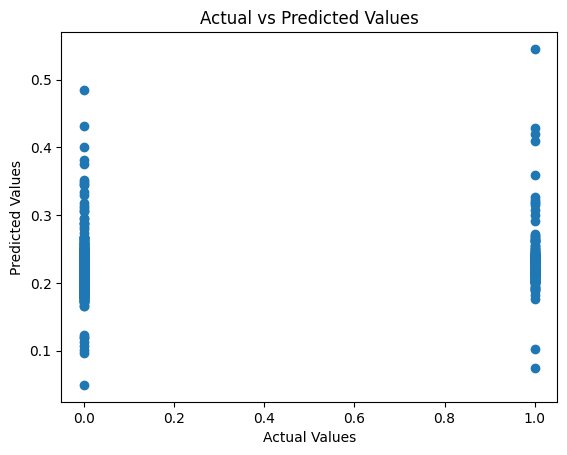

In [33]:
 plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()